<a href="https://colab.research.google.com/github/alexarroyo99/words_data_understanding/blob/main/wordle_words.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Obteniendo las longitudes de cada palabra**

In [ ]:
with open('/content/data/words_list.txt', 'r', encoding="utf8") as text_file:
  words_list = text_file.read().split('\n')

words_len_list=[len(w) for w in words_list]

# **Obteniendo la posicion de las letras**

In [87]:
import string

letters_list=list(string.ascii_lowercase+'ñ')
letters_pos_dict={}
for letter in letters_list:
  letters_pos_dict[letter]=[]

for word in words_list:
  for letter in word:
    letters_pos_dict[letter].append(int(word.index(letter)+1))


# **Calculando medidas de tendencia central para longitudes de palabras**

In [88]:
import numpy as np
from scipy import stats


words_len_array= np.array(words_len_list)
array_mode= stats.mode(words_len_array)
print(f"Media: {words_len_array.mean():.2f}")
print(f"Mediana: {np.median(words_len_array)}")
print(f"Moda: {array_mode[0][0]}")


Media: 8.48
Mediana: 8.0
Moda: 8


# **Calculando las medidas de posicionamiento estadistico y medidas de dispersion**

In [129]:
import statistics
from numpy import var
Q1=int(np.percentile(words_len_array,25))
Q2=int(np.median(words_len_array))
Q3=int(np.percentile(words_len_array,75))
P90=int(np.percentile(words_len_array,90))

print("LONGITUD DE PALABRAS")
print("____________________")
print(f"Cuartil 1: {Q1}")
print(f"Cuartil 2: {Q2}")
print(f"Cuartil 3: {Q3}")
print(f"Percentil 90: {P90}")
print(f"Rango: {Q3-Q1}")
print(f"Varianza: {var(words_len_array):.2f}")
print(f"Desviacion estandar: {statistics.pstdev(words_len_array):.2f}\n")
print("DISTRIBUCION DE POSICION DE LETRAS")
print("__________________________________")
for key in letters_pos_dict.keys():
  print(f"**{key.upper()}**")
  letter_pos_array=np.array(letters_pos_dict[key])
  Q1_l=int(np.percentile(letter_pos_array,25))
  Q3_l=int(np.percentile(letter_pos_array,75))
  print(f"Cuartil 1: {Q1_l}")
  print(f"Cuartil 2: {int(np.median(letter_pos_array))}")
  print(f"Cuartil 3: {Q3_l}")
  print(f"Rango: {Q3_l-Q1_l}")
  print(f"Varianza: {var(letter_pos_array):.2f}")
  print(f"Desviacion estandar: {statistics.pstdev(letter_pos_array):.2f}")



LONGITUD DE PALABRAS
____________________
Cuartil 1: 7
Cuartil 2: 8
Cuartil 3: 10
Percentil 90: 12
Rango: 3
Varianza: 6.83
Desviacion estandar: 2.45

DISTRIBUCION DE POSICION DE LETRAS
__________________________________
**A**
Cuartil 1: 2
Cuartil 2: 4
Cuartil 3: 6
Rango: 4
Varianza: 7.70
Desviacion estandar: 2.65
**B**
Cuartil 1: 1
Cuartil 2: 3
Cuartil 3: 6
Rango: 5
Varianza: 6.90
Desviacion estandar: 2.45
**C**
Cuartil 1: 1
Cuartil 2: 3
Cuartil 3: 6
Rango: 5
Varianza: 7.67
Desviacion estandar: 2.65
**D**
Cuartil 1: 1
Cuartil 2: 5
Cuartil 3: 7
Rango: 6
Varianza: 9.66
Desviacion estandar: 3.00
**E**
Cuartil 1: 2
Cuartil 2: 3
Cuartil 3: 5
Rango: 3
Varianza: 5.93
Desviacion estandar: 2.24
**F**
Cuartil 1: 1
Cuartil 2: 3
Cuartil 3: 5
Rango: 4
Varianza: 5.63
Desviacion estandar: 2.24
**G**
Cuartil 1: 2
Cuartil 2: 4
Cuartil 3: 5
Rango: 3
Varianza: 5.59
Desviacion estandar: 2.24
**H**
Cuartil 1: 1
Cuartil 2: 2
Cuartil 3: 4
Rango: 3
Varianza: 5.25
Desviacion estandar: 2.24
**I**
Cuartil 1: 2
C

# **Calculando frecuencias**

Frecuencia de la distribucion de letras

---



In [123]:
import pandas as pd
letter_pos_indexes=[i for i in range(1,21)]
letters_pos_frec_dict={"pos":letter_pos_indexes}
for letter in letters_list:
  letters_pos_frec_dict[letter]=[0]*20

for key in letters_pos_frec_dict.keys():
  if key =='pos':
    continue
  for pos in range(1,21):
    counter=letters_pos_dict[key].count(pos)
    letters_pos_frec_dict[key][pos-1]=counter
letters_pos_frec_df=pd.DataFrame(letters_pos_frec_dict)

letters_pos_frec_df.style.hide_index()


pos,a,b,c,d,e,f,g,h,i,j,k,l,m,n,o,p,q,r,s,t,u,v,w,x,y,z,ñ
1,6713,1224,5005,2959,4244,1168,962,944,3093,336,252,1227,2077,932,1214,3223,135,2841,3180,1794,297,882,170,35,79,88,2
2,8137,378,698,478,9363,182,237,377,4916,77,37,1212,680,3318,7223,479,61,3797,1491,502,2802,177,26,458,79,50,16
3,2811,1006,2379,1169,2674,560,912,208,2509,196,93,2450,1748,4451,2585,1361,158,4348,3312,2914,971,628,50,107,137,191,80
4,3829,435,1512,1183,3452,387,697,325,4395,136,161,1428,1090,1740,3080,863,107,2283,1717,2886,1348,573,42,58,113,185,15
5,3607,446,1334,1010,2902,253,528,253,3731,130,78,1647,661,2399,2476,405,69,3361,1601,1853,1123,265,36,30,115,166,68
6,2893,352,1280,1260,1677,252,485,124,2625,111,41,1127,675,2312,1905,261,45,1904,1678,1803,561,292,25,25,108,262,41
7,3151,305,842,1118,1097,117,251,100,2149,45,45,754,408,1465,2008,150,18,1104,1468,1270,471,198,16,17,80,269,37
8,2003,222,783,1036,761,103,191,62,1216,30,33,602,266,1274,1534,43,9,892,1326,792,228,164,4,5,59,158,16
9,1329,151,471,707,542,33,74,29,803,18,20,345,219,911,1340,37,6,465,1163,488,98,87,2,3,32,114,0
10,789,87,250,474,343,16,47,17,379,3,8,235,147,628,860,14,10,226,1036,269,55,73,2,1,12,103,2


Frecuencia de longitud de palabras

---



In [120]:
words_len_frec_list=[]
words_len_indexes=[]
for lenght in range(4,21):
  words_len_indexes.append(lenght)
  words_len_frec_list.append(words_len_list.count(lenght))

words_len_frec_dict={"char_len": words_len_indexes,
                     "lenght_frec": words_len_frec_list}

words_len_frec_df=pd.DataFrame(words_len_frec_dict)
words_len_frec_df.style.hide_index()

char_len,lenght_frec
4,1374
5,2778
6,3705
7,4706
8,4879
9,4539
10,3826
11,2669
12,1770
13,1099


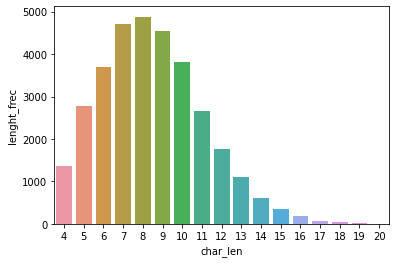

In [114]:
import seaborn as sns

sns.barplot(data=words_len_frec_df,x='char_len',y='lenght_frec')

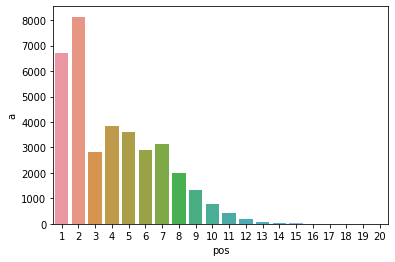

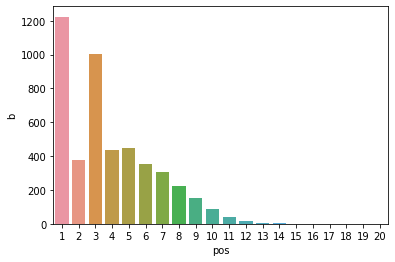

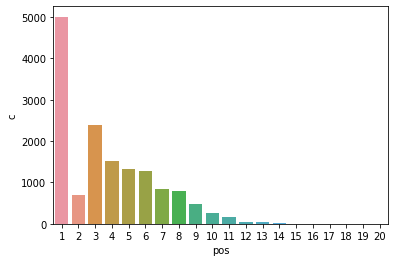

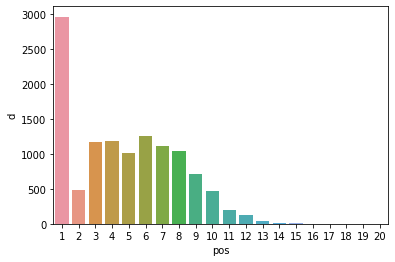

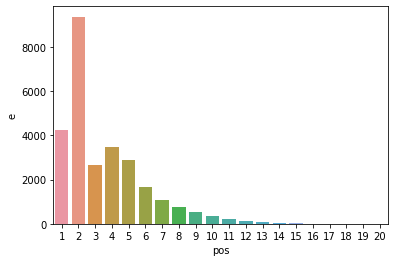

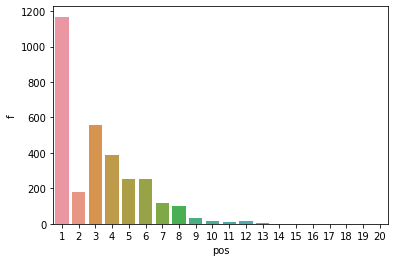

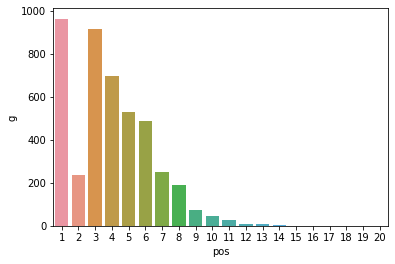

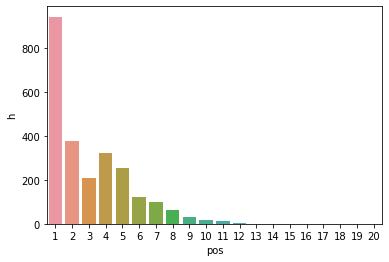

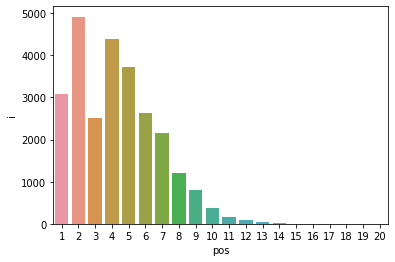

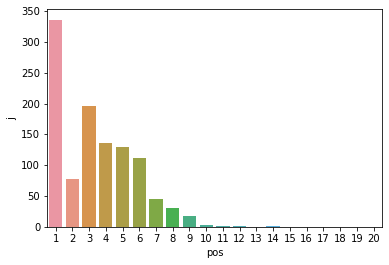

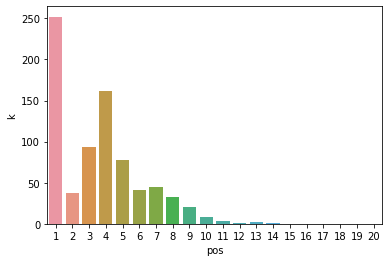

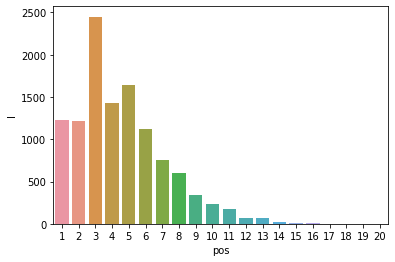

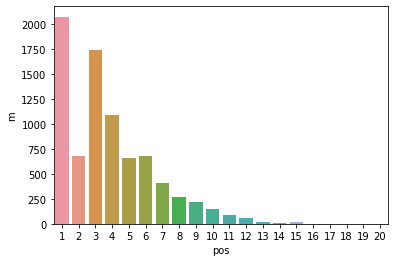

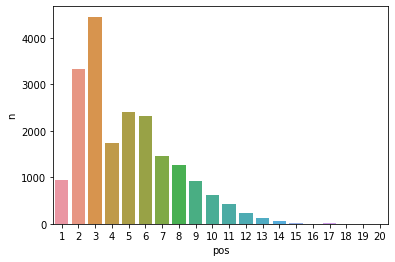

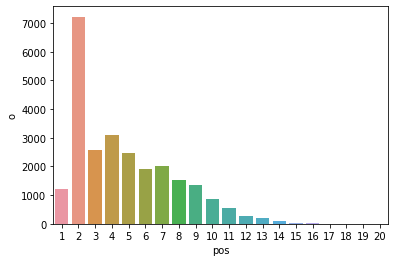

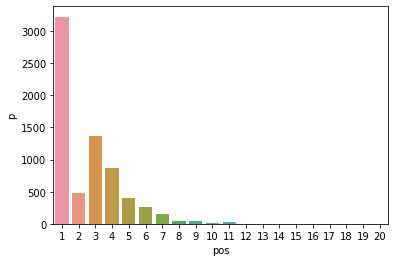

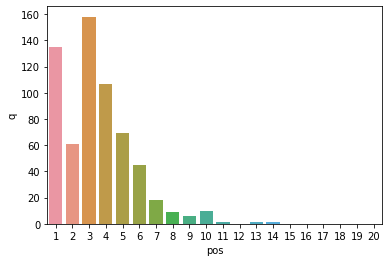

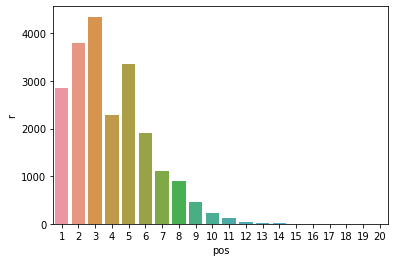

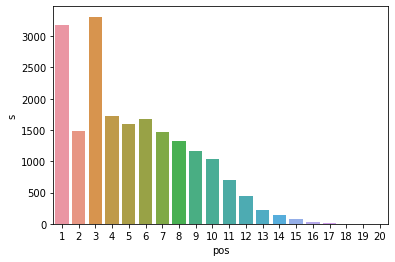

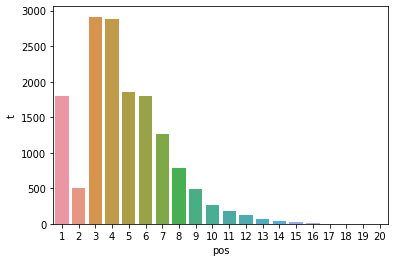

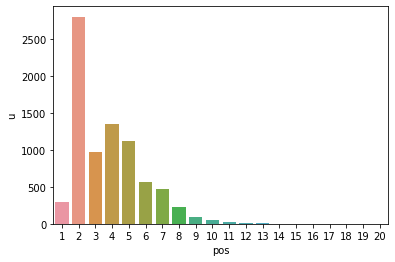

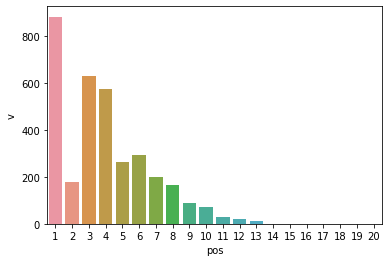

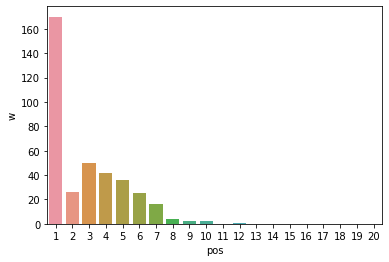

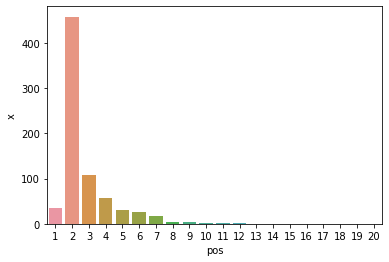

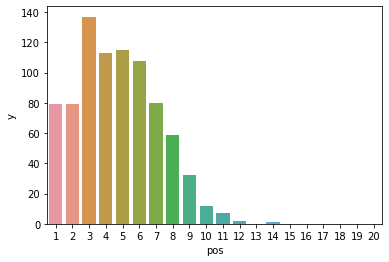

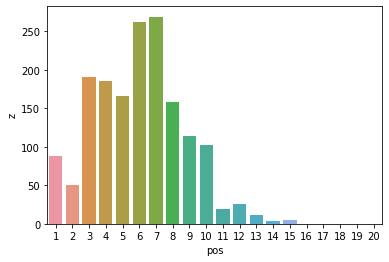

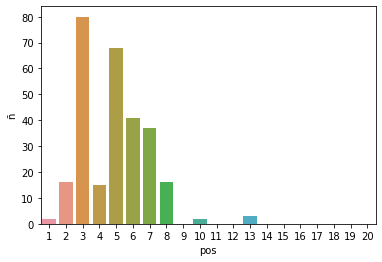

In [126]:
import matplotlib.pyplot as plt

for letter in letters_list:
  sns.barplot(data=letters_pos_frec_df,x="pos", y=letter)
  plt.show()